In [97]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# For CSV
df = pd.read_csv("klar_for_oppgave_5.csv")

In [98]:
# Define the features (PLS components)
X = df.drop(columns=["Close"])  # Drop the target column

# Define the target (Close price)
y = df["Close"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Regression

## Why implement regression?
Linear regression is a ... **supervised machine-learning algorithm** (source), and maps the data points to the most optimized linear functions. Since we already have selected key features with little data overlapping as a result of the PLS, we can say that due PLS components being mostly independent and orthogonal to each other, linear regression might be a good fit. However, as we will soon see, some of the trends from the stock market features are dependent of each others, breaking the condition of multicollinearity. Some of the components however are well fit to the "Close" tag, suggesting that maybe a **simple linear regression** might be suffisient. We will therefore implement the simple linear regression, then the multiple linear regression, and ultimately look a non-linear approach: polynomail regression. 

Another benefit of performing linear regression on the dataframe, is that it serves as a baseline as an additive model. We will later compare this with other non-linear algorithms to measure performance.

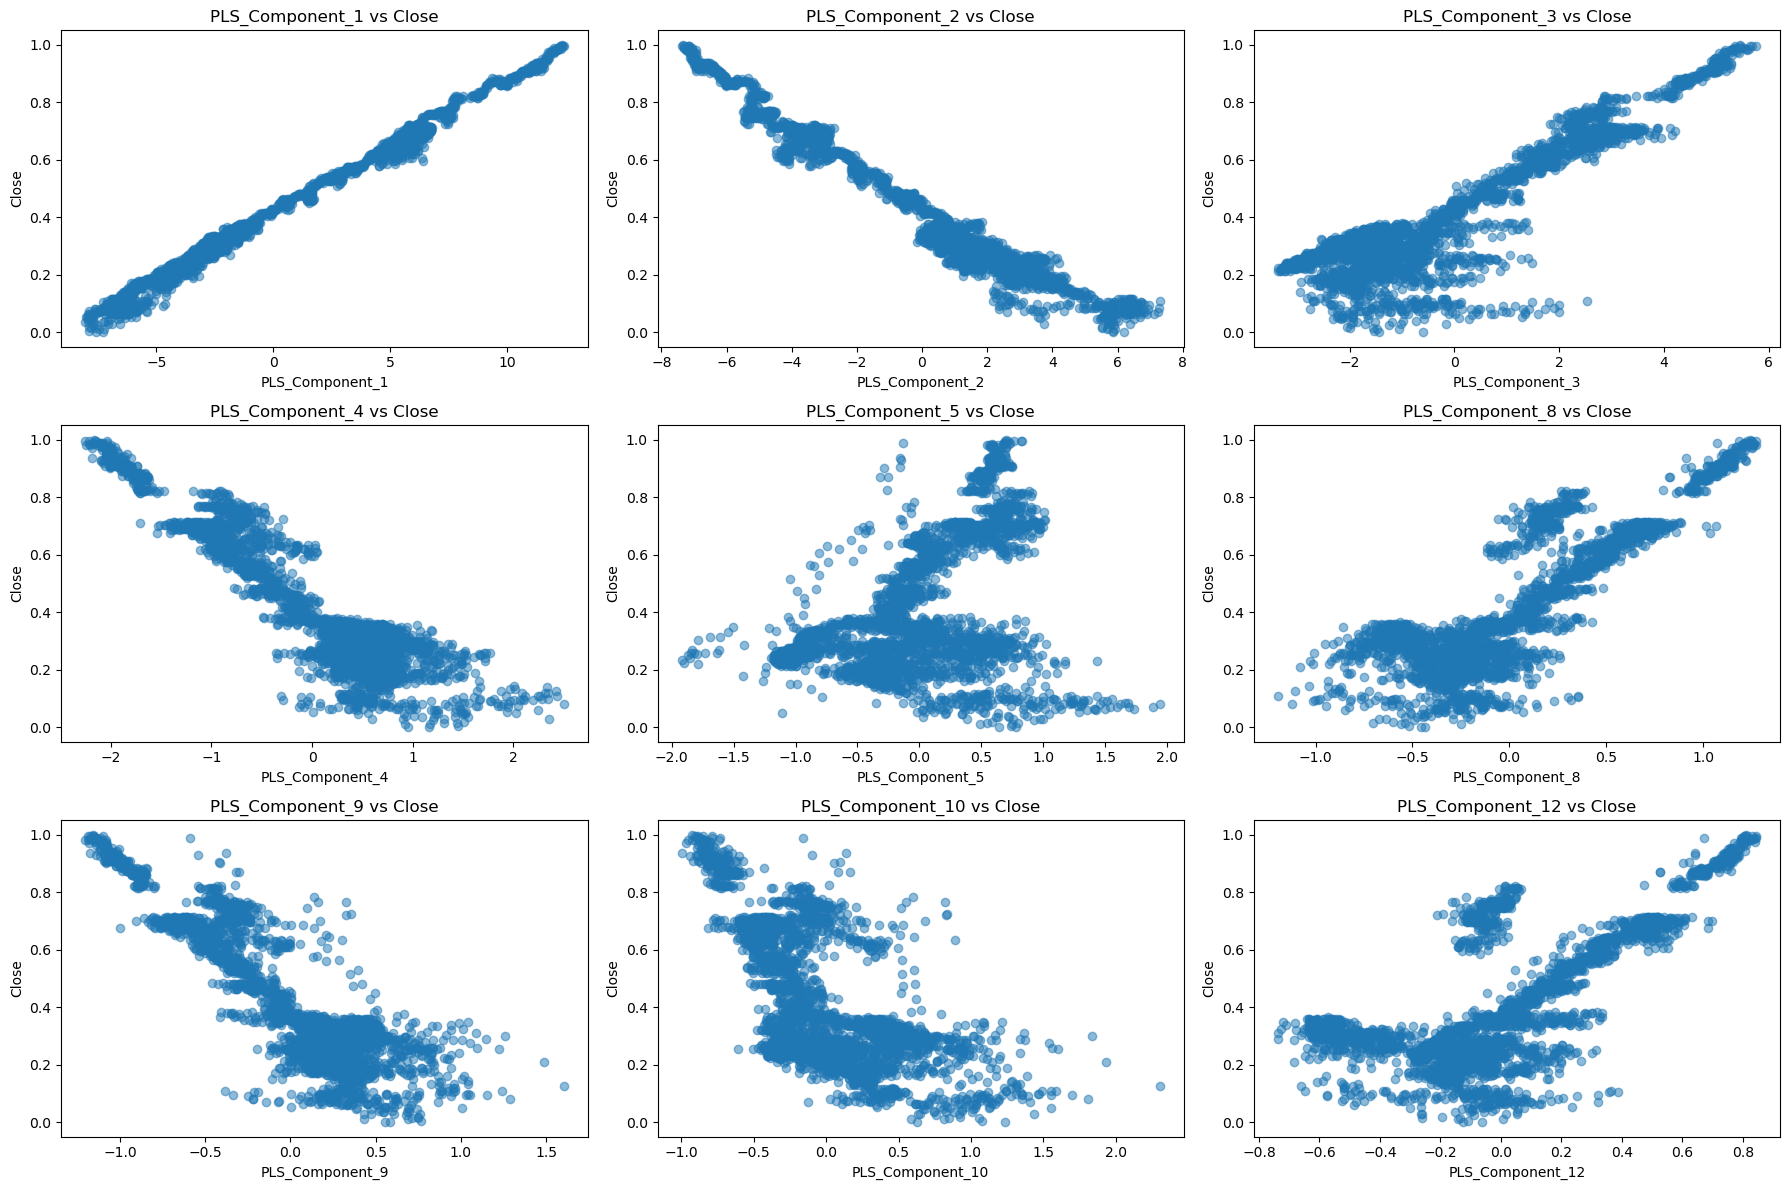

In [99]:
import matplotlib.pyplot as plt

# Define the number of components and number of columns per row
components = [1, 2, 3, 4, 5, 8,9,10,12]  # List of PLS components you want to display
num_cols = 3  # Number of plots per row
num_rows = (len(components) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure and subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each selected PLS component against Close
for i, comp in enumerate(components):
    axes[i].scatter(df[f'PLS_Component_{comp}'], df['Close'], alpha=0.5)
    axes[i].set_xlabel(f'PLS_Component_{comp}')
    axes[i].set_ylabel('Close')
    axes[i].set_title(f'PLS_Component_{comp} vs Close')

# Turn off any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Simple Linear Regression

### Linearity
Based on the image, we can see that most of the components values does not follow a linear function, and instead contain non-linear traits. Looking at component 1 however, we can see that the data points align in a clear straight line, fulfilling an important assumption for developing a regression algorith: linearity. This is an essential property that makes it easier and clearer to determine a straight line as close as possible to the datapoints. 

### Homoscedasticity and Normality
Homoscedasticity implies that there is a constant variance of residuals. This would mean that the residulals are scattered randomly by some value from the center. As you can see from the figure, the resiudals somewhat follows a pattern looking like a bowtie and contains clusters. This is a common sign of heterodasticity, which stems from varying variance in the data. This is makes the accuracy of the model less trustable, since it might not represent the actual accuracy. The graph is normalized, as seen in the figure, so most of the assumptions for linear regression are met, with the exception of homoscedasticity. This makes sense, since the data contains non-linear patterns. 
https://www.statology.org/linear-regression-assumptions/

### Stats
Mean Squared Error (MSE): 0.00038878192957791854
R-squared (R2): 0.992170581416779
The Mean Squared Error shows the average difference between the actual and the predicted value. The lower this is, the better. The MSE value is very good - implying either a very accurate algorithm, or something wrong. Heterodasticity is possibly a factor that influenses this. The R-squared value is also very good, where a higher value implies 




Mean Squared Error (MSE): 0.00038878192957791854
R-squared (R2): 0.992170581416779


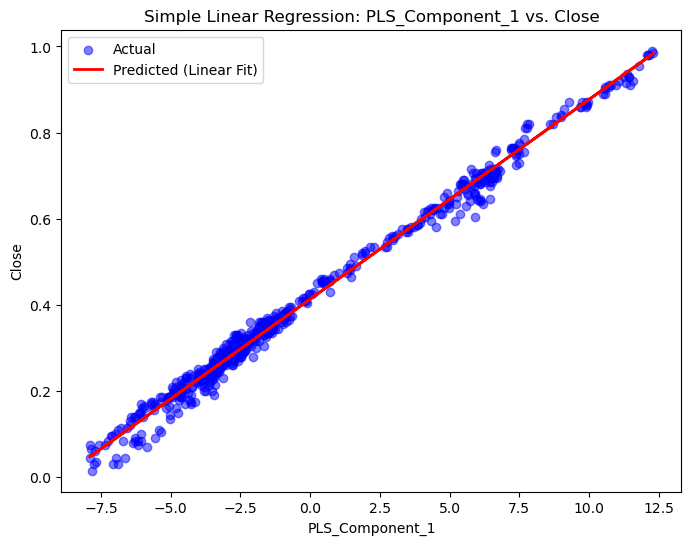

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the predictor and target variable
# Assuming 'data' DataFrame already contains 'PLS_Component_1' and 'Close'
X = df[['PLS_Component_1']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted (Linear Fit)")
plt.xlabel("PLS_Component_1")
plt.ylabel("Close")
plt.title("Simple Linear Regression: PLS_Component_1 vs. Close")
plt.legend()
plt.show()


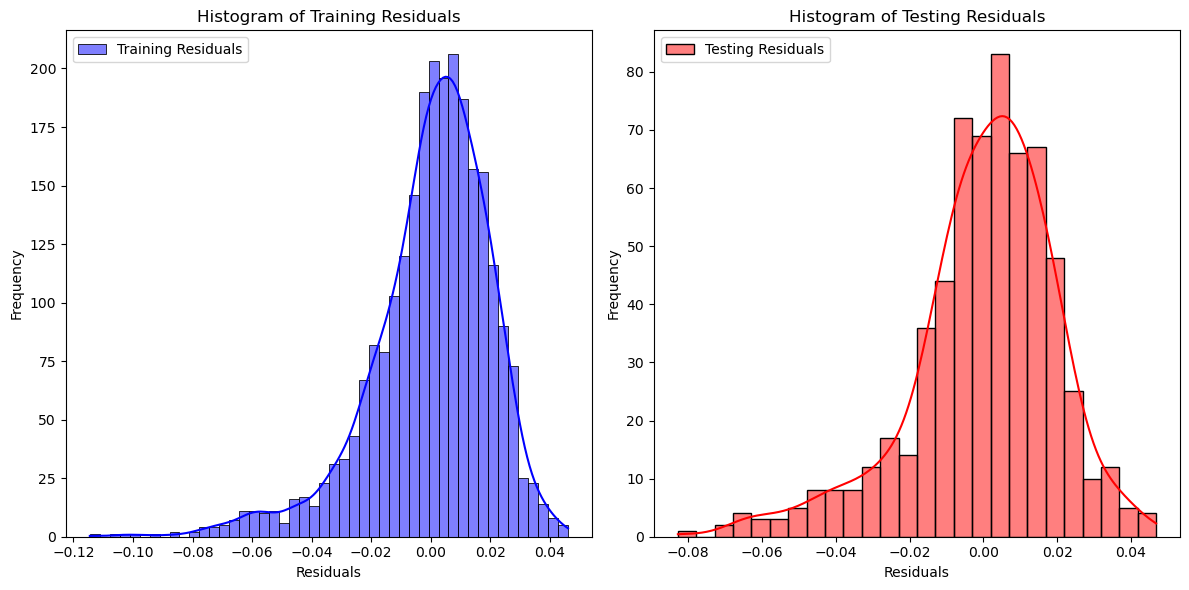

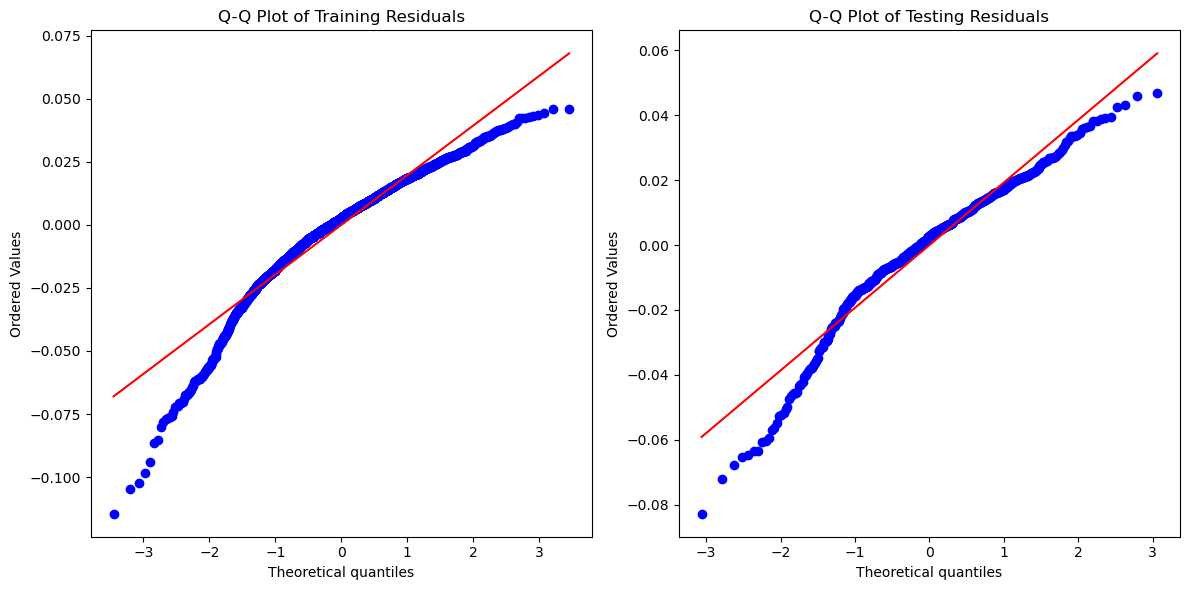

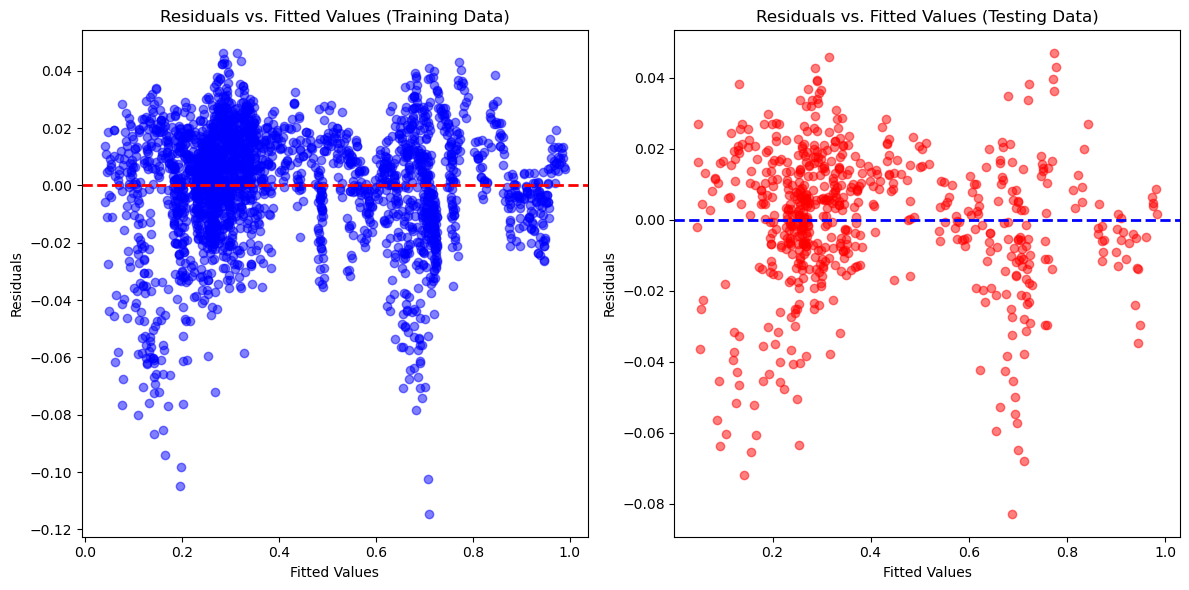

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import the stats module

## Calculate the fitted values (predictions) for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate residuals for training and testing sets
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot a histogram for both training and testing residuals
plt.figure(figsize=(12, 6))

# Plot training residuals histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True, color='blue', label='Training Residuals')
plt.title('Histogram of Training Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Plot testing residuals histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True, color='red', label='Testing Residuals')
plt.title('Histogram of Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Q-Q plots for both training and testing residuals
plt.figure(figsize=(12, 6))

# Plot training residuals Q-Q plot
plt.subplot(1, 2, 1)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Training Residuals')

# Plot testing residuals Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Testing Residuals')

plt.tight_layout()
plt.show()

# Plot Residuals vs. Fitted Values to check for Homoscedasticity
plt.figure(figsize=(12, 6))

# Residuals vs. Fitted Values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.5)
plt.axhline(0, color='red', linewidth=2, linestyle='--')  # Horizontal line at zero
plt.title('Residuals vs. Fitted Values (Training Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residuals vs. Fitted Values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, color='red', alpha=0.5)
plt.axhline(0, color='blue', linewidth=2, linestyle='--')  # Horizontal line at zero
plt.title('Residuals vs. Fitted Values (Testing Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## Multiple linear regression
When looking at multiple linear regression we also need to check for multicollinnearity as well as the same values in simple linear regression. Multicollinnearity is when two or more predictors (PLS componentents in our case) have a high corrolation. Idealy we want each compoent to provide unique information, and be orthogonoal with the other components. This is not the case, since many of the PLS_Components have an extreme correlation despite being selected. 

We get that the R-squared value is higher and the MSE value is lower, suggesting that it has a higher accuracy than the simple linear regression. Considering that it captures more of the variance in the dataframe, this makes sense, but we can also see the high correlation for example between PLS_Component_1 and PLS_Component_2, reducing the validicy. 


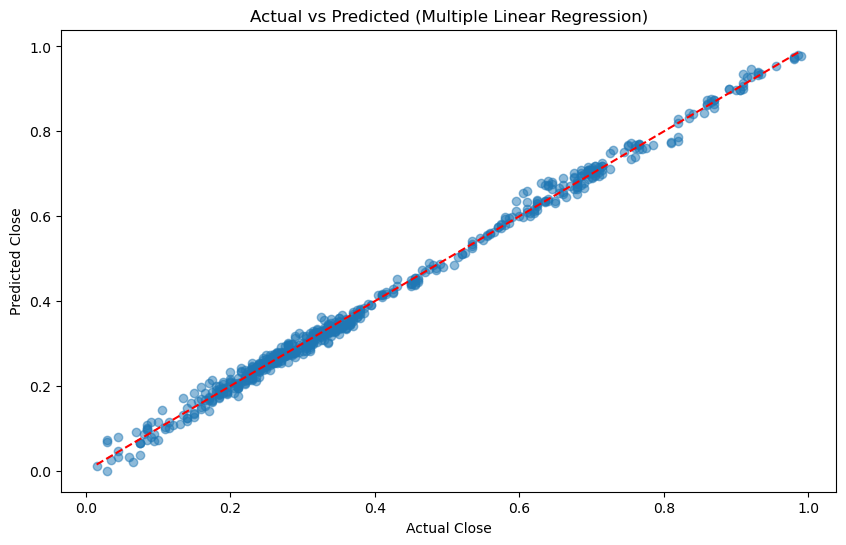

Mean Squared Error (MSE): 0.0001996421743642254
R-squared (R2): 0.995979540119936


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe and you've selected the features and target
X = df[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 
        'PLS_Component_5', 'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10', 'PLS_Component_12']]
y = df['Close']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Actual vs Predicted (Multiple Linear Regression)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

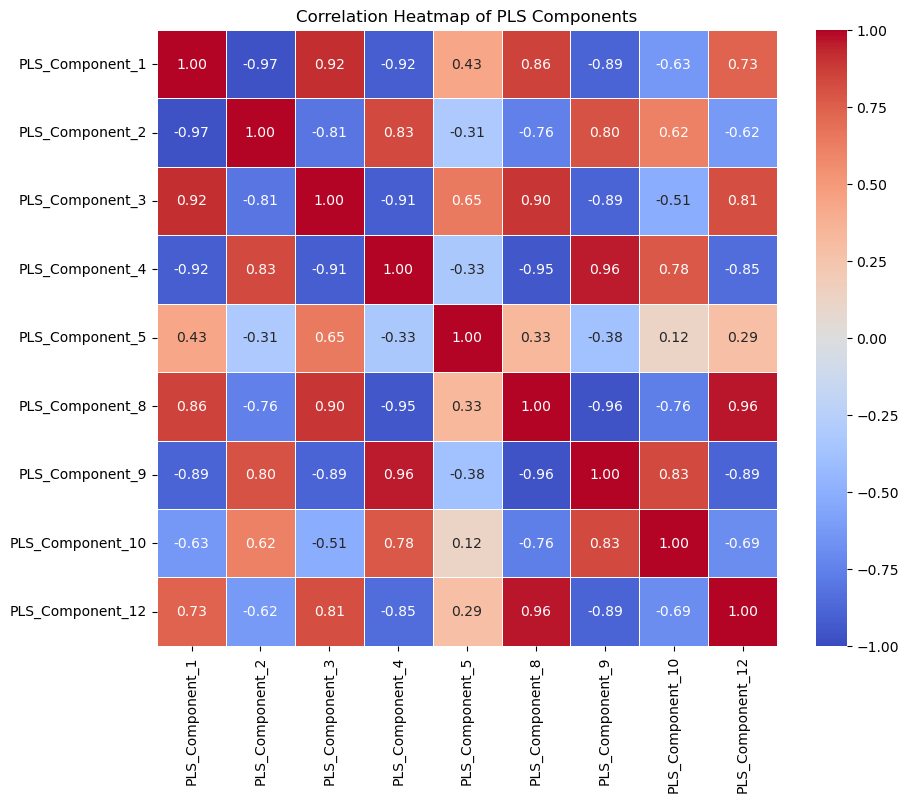

In [103]:
# Select the PLS components from the dataframe
pls_components = [f'PLS_Component_{comp}' for comp in components]
df_pls = df[pls_components]

# Calculate the correlation matrix
corr_matrix = df_pls.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of PLS Components')
plt.show()

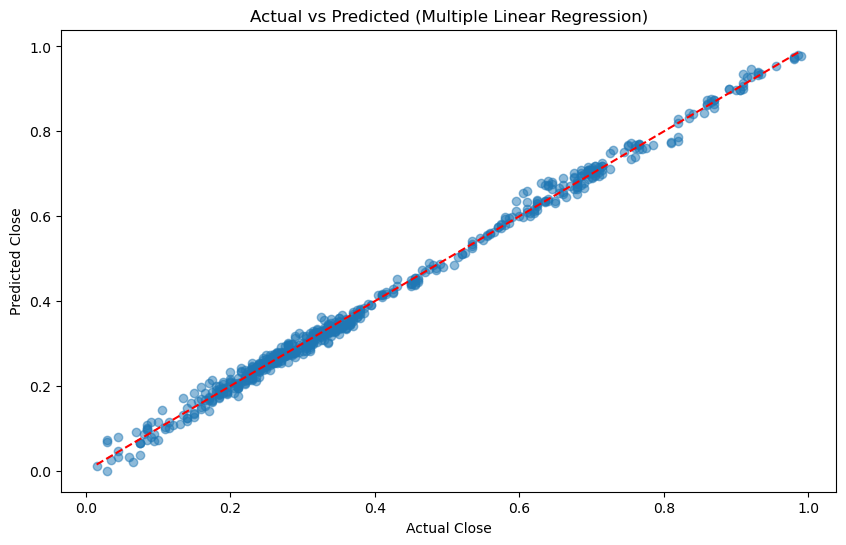

Mean Squared Error (MSE): 0.0001996421743642254
R-squared (R2): 0.995979540119936


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe and you've selected the features and target
X = df[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 
        'PLS_Component_5', 'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10', 'PLS_Component_12']]
y = df['Close']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Actual vs Predicted (Multiple Linear Regression)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

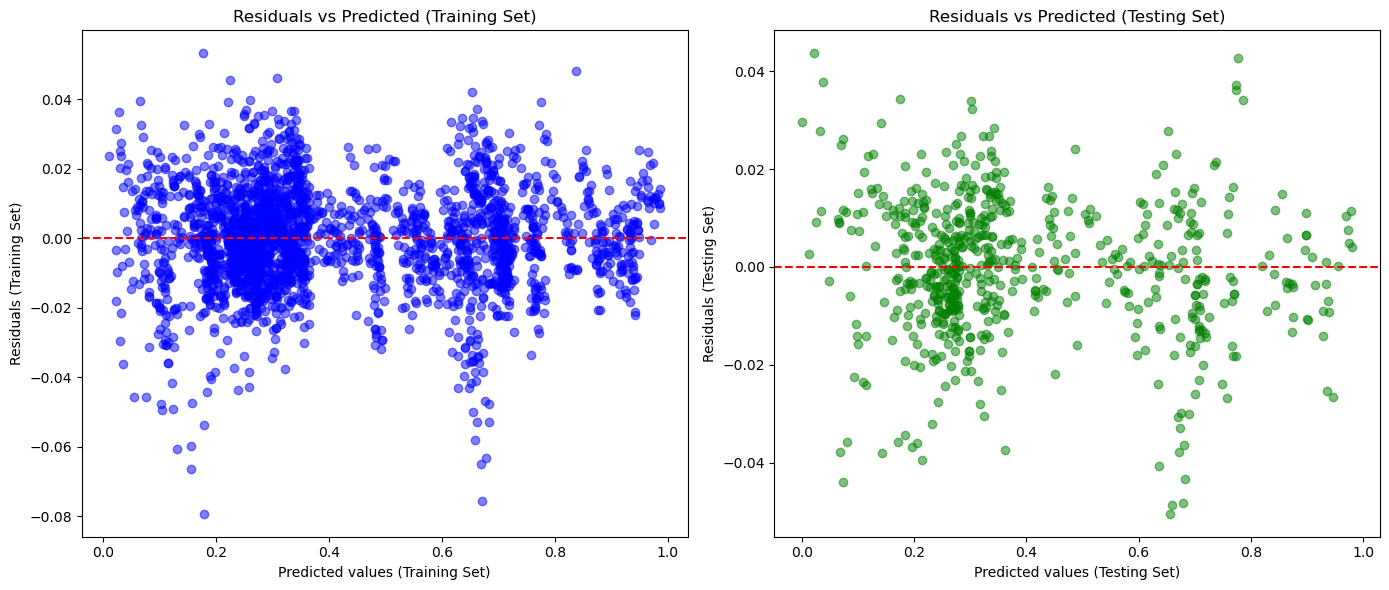

In [105]:
X = df[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 'PLS_Component_5', 'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10', 'PLS_Component_12']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Optionally, add residuals to the test data for analysis
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the residuals
import matplotlib.pyplot as plt
import seaborn as sns

# Predict target values on training set
y_train_pred = model.predict(X_train)

# Calculate residuals for training set
train_residuals = y_train - y_train_pred

# Plot residuals for the training set
plt.figure(figsize=(14, 6))

# Training residuals
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted (Training Set)')
plt.xlabel('Predicted values (Training Set)')
plt.ylabel('Residuals (Training Set)')

# Testing residuals
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted (Testing Set)')
plt.xlabel('Predicted values (Testing Set)')
plt.ylabel('Residuals (Testing Set)')

plt.tight_layout()
plt.show()

## Polynomial regression
This form for regression is non-linear, and has the potential to capture some different trends that linear regression will. However 

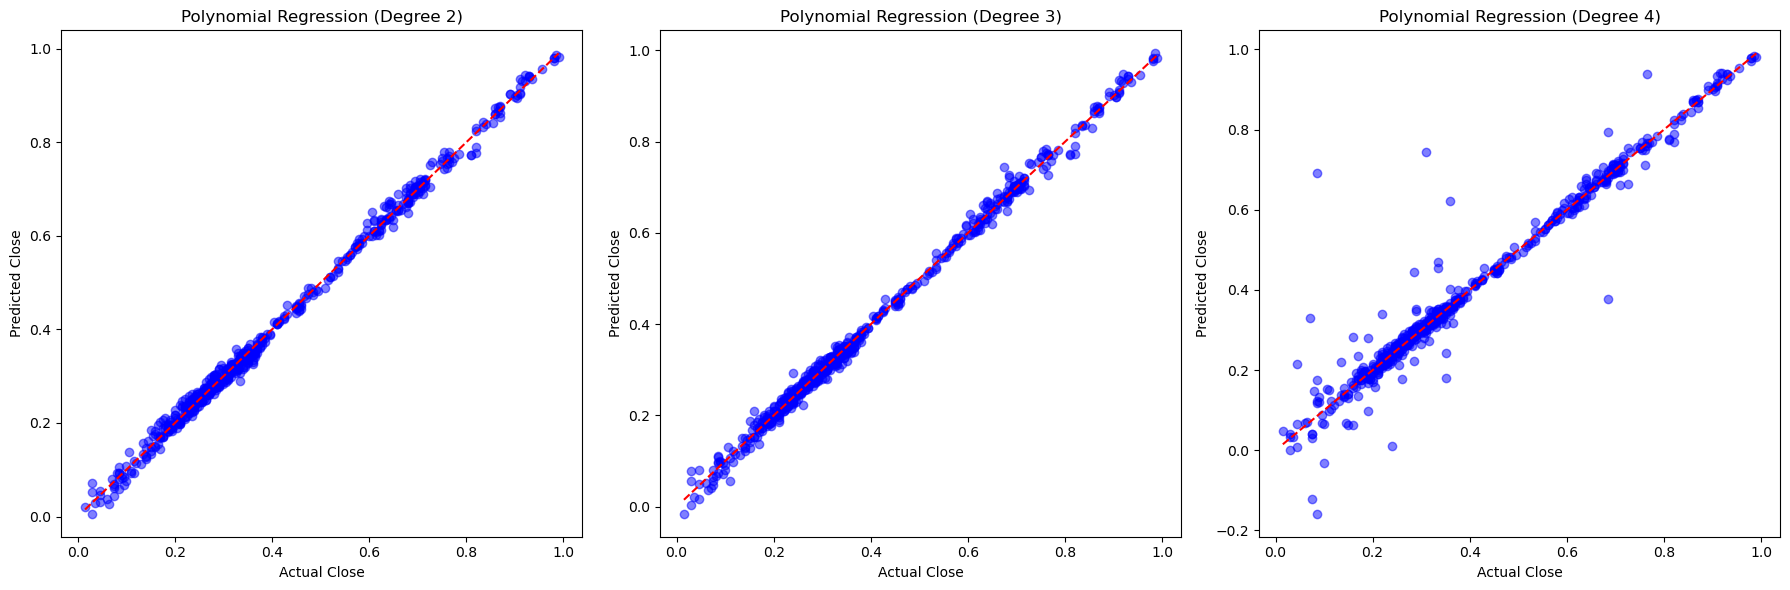

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe and you've selected the features and target
X = df[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 
        'PLS_Component_5', 'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10', 'PLS_Component_12']]  # All PLS components
y = df['Close']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure with 3 subplots for degree 2, 3, and 4
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define degrees to test
degrees = [2, 3, 4]

# Plot polynomial regression for each degree
for i, degree in enumerate(degrees):
    # Transform the features into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    
    # Plotting Actual vs Predicted values for each degree
    axes[i].scatter(y_test, y_pred, color='blue', alpha=0.5)
    axes[i].plot( [min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
    axes[i].set_title(f'Polynomial Regression (Degree {degree})')
    axes[i].set_xlabel('Predicted Close')
    axes[i].set_ylabel('Actual Close')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Now that we know that _____ is the best form for regression on the dataframe, we should check whether it fufills the following conditions:
found here: https://www.geeksforgeeks.org/ml-linear-regression/ 
  for linear regression:
- Linearity
- Independence
- Homoscedasticity
- Normality
  for polynomial regression:
- no multicollinearity
- additivity
- feature selection
- Overfitting